In [105]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import pandas as pd
import os
import sys
#from scipy.fftpack import dct, idct
#from scipy.optimize import minimize
#sys.path.append(os.path.join('..','UTILS'))
#from cosamp_fn import cosamp

<h2>Exer 3.2</h2>

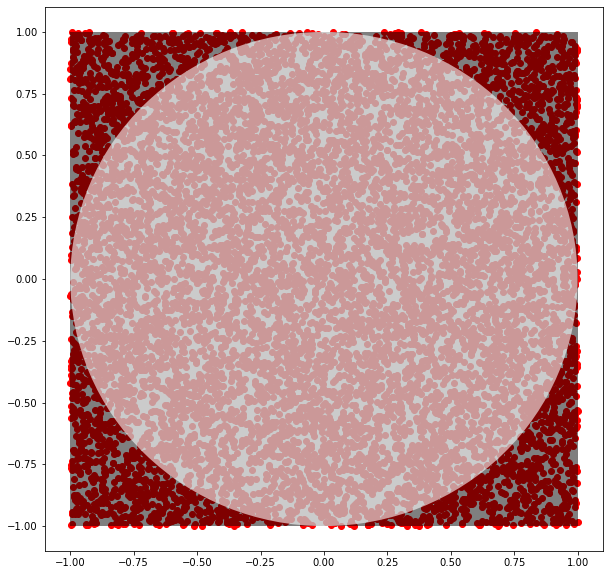

In [104]:
S = 2 #side of square
R = 1 #radius of circle

#Graph the Circle, Square, and the 10000 normally distributed dart throws
f, ax = plt.subplots(figsize=(10,10))
ax.plot()
ax.add_patch(Rectangle((-1,-1), S, S, fill=True, facecolor='black', alpha = 0.5));
ax.add_patch(Circle((0,0), R, fill=True, facecolor='white', alpha = 0.6 ));
ax.scatter(np.linspace(-1,1,10000), sp.uniform(-1,2).rvs(10000), color='red');

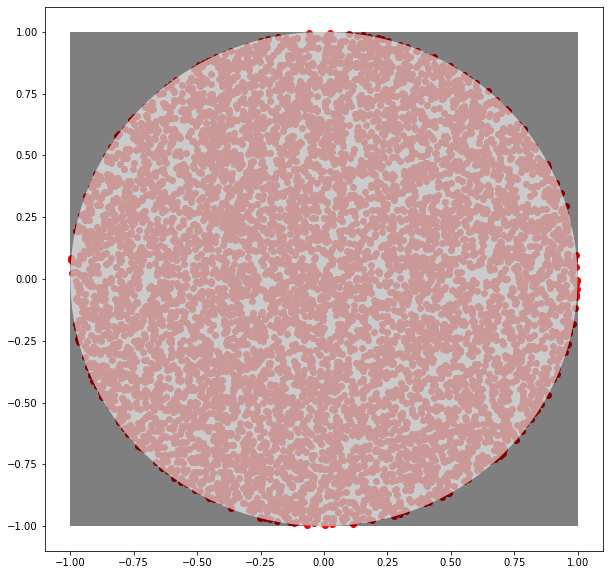

In [62]:
#How many went inside the circle?
check = np.vstack((sp.uniform(-1,2).rvs(10000), sp.uniform(-1,2).rvs(10000))).reshape(-1,2)
dim2_pts = sum(check[:,0]**2 + check[:,1]**2 <= 1)/10000

#Graph the Circle, Square, and the dart throws that landed inside the circle
f, ax = plt.subplots(figsize=(10,10))
ax.add_patch(Rectangle((-1,-1), S, S, fill=True, facecolor='black', alpha = 0.5))
ax.add_patch(Circle((0,0), R, facecolor='white', alpha = 0.6 ))
ax.scatter(check[(check[:,0]**2 + check[:,1]**2 <= 1)][:,0],
           check[(check[:,0]**2 + check[:,1]**2 <= 1)][:,1], color='red');

In [63]:
print(dim2_pts*100,"% of the dots are inside the circle, close enough to pi/4")

78.08 % of the dots are inside the circle.


IndexError: index 8 is out of bounds for axis 0 with size 8

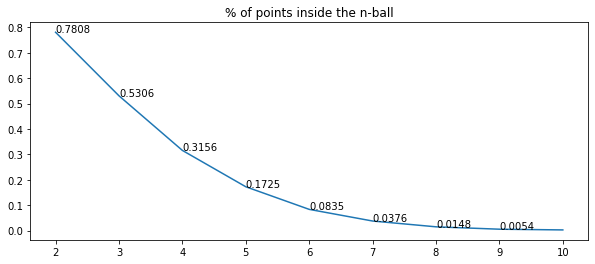

In [96]:
#plotting for dimension: 3 to 10
N = 10000
dataset = pd.DataFrame(np.vstack((sp.uniform(-1,2).rvs(N), sp.uniform(-1,2).rvs(N))).reshape(-1,2), columns=['x','y'])

d = np.arange(3,11,1)

inside_n_ball = np.array(dim2_pts)
for i,n in enumerate(d):
    dataset[i+3] = sp.uniform(-1,2).rvs(N)
    dim_n_pts = dataset[((dataset**2).sum(axis=1) <= R**2)] #check how many is inside the sphere
    inside_n_ball = np.append(inside_n_ball, dim_n_pts.shape[0]/N)

#Plot of Fraction of Points that landed inside the sphere
f, ax = plt.subplots(figsize=(10,4))
ax.plot(range(2,11),inside_n_ball)
ax.set_title('% of points inside the n-ball')
for i in range(10):
  ax.text(d[i]-1, inside_n_ball[i], inside_n_ball[i], size=10)



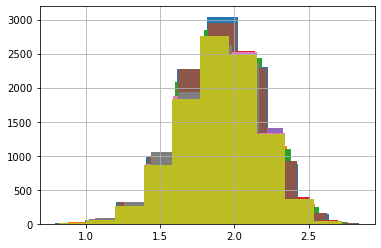

In [65]:
#Radii of the randomly sampled points for each N

h = np.arange(2,11,1)
for i,n in enumerate(h):
    dataset[i+2] = sp.uniform(-1,2).rvs(N)
    np.sqrt((dataset**2).sum(axis=1)).hist();

<h2>Exer 3.3</h2>

In [97]:
## Create K-Sparse vectors

n = 1000
K = 0.05
s = sparse.random(n,1,K)
#t = np.linspace(0,1,n)
#x = np.cos(2 * 97 * np.pi * t) + np.cos(2 * 777 * np.pi * t)
xt = np.fft.fft(s) # Fourier transformed signal
PSD = xt * np.conj(xt) / n # Power spectral density

In [98]:
## Randomly sample signal
p = 100 # num. random samples
perm = np.floor(np.random.rand(p) * n).astype(int)
y = s[perm]

In [107]:
## Solve compressed sensing problem
Psi = dct(np.identity(n)) # Build Psi
Theta = Psi[perm,:]       # Measure rows of Psi

#s = cosamp(Theta,y,10,epsilon=1.e-10,max_iter=10) # CS via matching pursuit
#xrecon = idct(s) # reconstruct full signal

<h2>Exer 3.6</h2>

In [ ]:
mat_contents = scipy.io.loadmat(os.path.join('CYLINDER_ALL.mat')
vortall = mat_contents['VORTALL']
Uall = mat_contents['UALL']
Vall = mat_contents['VALL']

m, n = *mat_contents['m'], *mat_contents['n']

